<a href="https://colab.research.google.com/github/ocoropuj/PHYS434/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson, t
import scipy as sp

In [2]:
np.random.seed(69)


## Sample x

In [3]:
sample_x = np.random.rand(1000)

[]

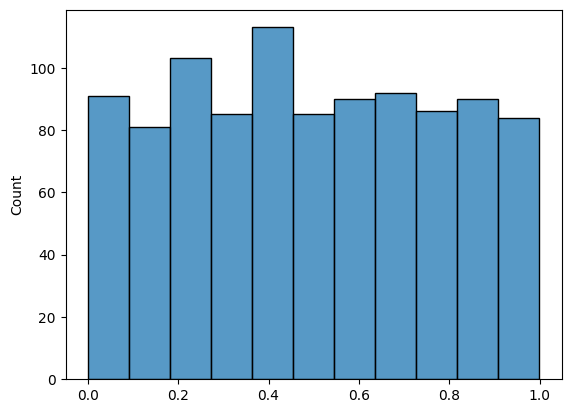

In [4]:
sns.histplot(sample_x)
plt.plot()

# Change of Variables

## Sample u = x²

pdf(u) = 1/2√u since for u=x², du/dx = 2x, and therefore f(u)=1/2x=1/√(u)

In [5]:
sample2 = sample_x.copy() ** 2

<ipython-input-6-bd3f120f1225>:6: RuntimeWarning: divide by zero encountered in divide
  y = 1/(2*np.sqrt(x))


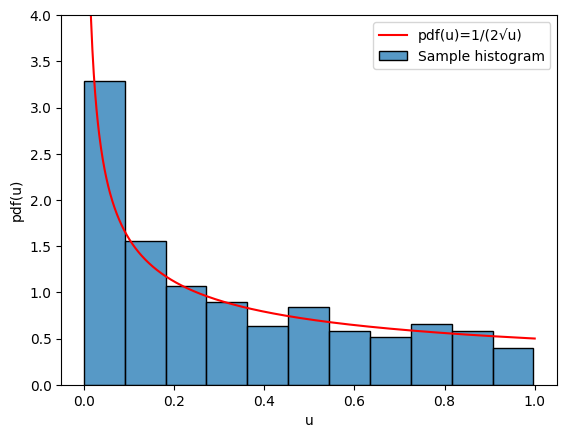

In [6]:
#Histogram
hist = sns.histplot(sample2, stat='density', label='Sample histogram')

#Analytic distribution
x = np.linspace(0,1,1000)
y = 1/(2*np.sqrt(x))
plt.plot(x,y, label='pdf(u)=1/(2√u)', color='red')


#Plotting definitions
plt.legend()
plt.xlabel('u')
plt.ylabel('pdf(u)')
plt.ylim(0,4)
plt.show()


## Sample u = 1/x

pdf(u) = 1/u² since du/dx = 2/x³, so for f(u) = 1/x * x³ = x² and f(u) = 1/u²

In [7]:
sample3 = 1 / sample_x.copy()


<ipython-input-8-e90fd4c396fd>:6: RuntimeWarning: divide by zero encountered in divide
  y = 1/((x)**2)


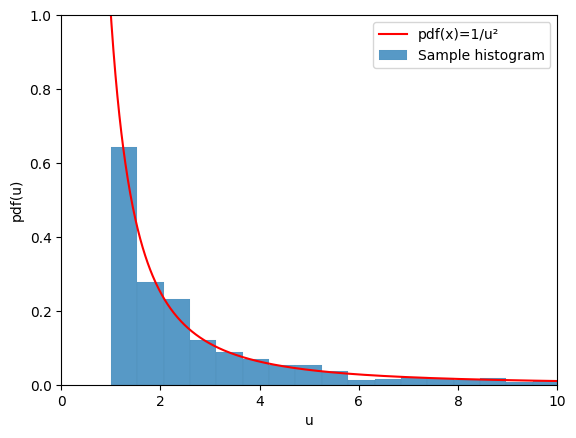

In [8]:
#Histogram
hist = sns.histplot(sample3, stat='density', label='Sample histogram')

#Analytic distribution
x = np.linspace(0,10,1000)
y = 1/((x)**2)
plt.plot(x,y, label='pdf(x)=1/u²', color='red')


#Plotting definitions
plt.legend()
plt.xlabel('u')
plt.ylabel('pdf(u)')
plt.ylim(0,1)
plt.xlim(0,10)
plt.show()


## Sample u=√x

pdf(u) = 2x since du/dx = 1/2√x and f(u)=2√x=2u

In [9]:
sample4 = np.sqrt(sample_x.copy())


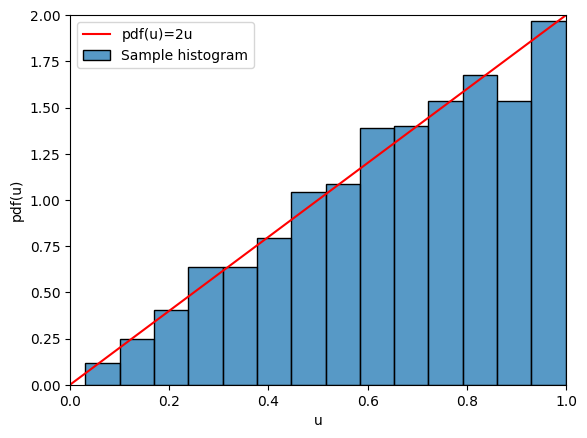

In [10]:
#Histogram
hist = sns.histplot(sample4, stat='density', label='Sample histogram')

#Analytic distribution
x = np.linspace(0,1,1000)
y = ((x)*2)
plt.plot(x,y, label='pdf(u)=2u', color='red')


#Plotting definitions
plt.legend()
plt.xlabel('u')
plt.ylabel('pdf(u)')
plt.ylim(0,2)
plt.xlim(0,1)
plt.show()


## Sample u=exp(x)

pdf(u) = 1/x since du/dx = e^x and f(u) = 1 / e^x and log(u)=x so: f(u)=1/u

In [11]:
sample5 = np.exp(sample_x.copy())


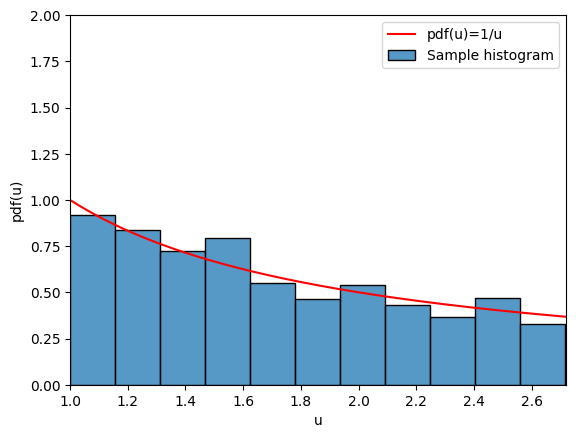

In [12]:
#Histogram
hist = sns.histplot(sample5, stat='density', label='Sample histogram')

#Analytic distribution
x = np.linspace(1,np.exp(1),1000)
y = (1/(x))
plt.plot(x,y, label='pdf(u)=1/u', color='red')


#Plotting definitions
plt.legend()
plt.xlabel('u')
plt.ylabel('pdf(u)')
plt.ylim(0,2)
plt.xlim(1,np.exp(1))
plt.show()


## Sample u=log(x)

pdf(u) = e^x since du/dx=1/x and f(u) = x, since e^u=x: f(u)=e^x

In [13]:
sample6 = np.log(sample_x.copy())


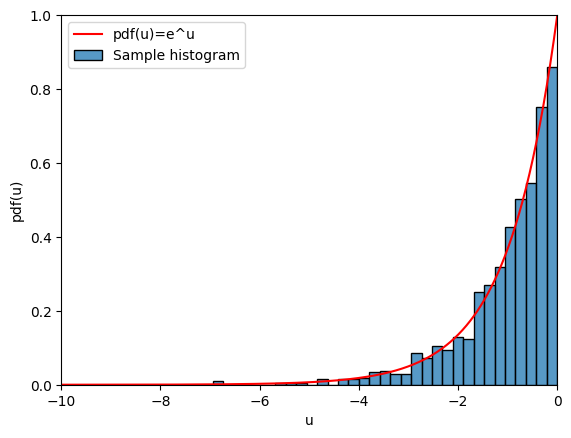

In [14]:
#Histogram
hist = sns.histplot(sample6, stat='density', label='Sample histogram')

#Analytic distribution
x = np.linspace(-10,0,1000)
y = (np.exp(x))
plt.plot(x,y, label='pdf(u)=e^u', color='red')


#Plotting definitions
plt.legend()
plt.xlabel('u')
plt.ylabel('pdf(u)')
plt.ylim(0,1)
plt.xlim(-10,0)
plt.show()


# Dice

In [15]:
np.random.seed(69)
sample_dice1 = ((6*np.random.rand(1000)+1)).astype(int)
np.random.seed(420)
sample_dice2 = ((6*np.random.rand(1000)+1)).astype(int)


In [16]:
sample_dice = sample_dice1 + sample_dice2

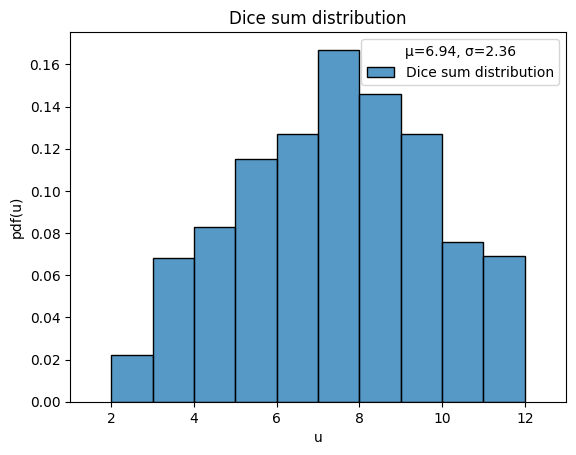

In [17]:
sns.histplot(sample_dice, stat='density', binwidth=1, label='Dice sum distribution')

µ_d = np.mean(sample_dice)
σ_d = np.std(sample_dice)

plt.xlabel('u')
plt.ylabel('pdf(u)')
plt.legend(title=f'µ={µ_d:.2f}, σ={σ_d:.2f}')
plt.title('Dice sum distribution')

#plt.ylim(0,1)
plt.xlim(1,13)
plt.show()



In [18]:
p7= len(sample_dice[sample_dice==7])/1000
print(f'P(Dice_sample1 + Dice_sample2 = 7) ≈ {100*p7:.3f}%')


P(Dice_sample1 + Dice_sample2 = 7) ≈ 16.700%


Since we can get a sum of 7 from 1+6, 2+5,3+4,4+3,2+5,1+6 (6 possible combinations) and two dice have 36 possible combinations:
P( ∑ Dice = 7 ) = 6/36 = 1/6 ≈ 16.666...%

# CLT

In [19]:
λ=2

In [20]:
def clt_exercice(N, λ, M=5 , plot=False, binwidth=1, kde=False):
    # Create arrays
    µ_p = np.zeros(N)
    σ_p = np.zeros(N)

    # Generate the samples of size {M}
    for i in range(N):
        sample_p = poisson.rvs(λ, size=M)
        # Calculate the mean (μ) and standard deviation (σ)
        mean = np.mean(sample_p)
        std_deviation = np.std(sample_p)

        µ_p[i] = mean
        σ_p[i] = std_deviation

    if plot == True:
        sns.histplot(µ_p, stat='density', kde=kde, label=f'Mean -> µ={µ_p.mean():.2f}; σ={µ_p.std():.2f}', binwidth=binwidth)
        sns.histplot(σ_p, stat='density', kde=kde, label=f'Standard Deviation -> µ={σ_p.mean():.2f}; σ={σ_p.std():.2f}', binwidth=binwidth)
        plt.legend()
        plt.xlabel('x')
        plt.title(f'N={N}, λ={λ}, M={M}')
        plt.show()
        return None

    return µ_p, σ_p


N=10, λ=2


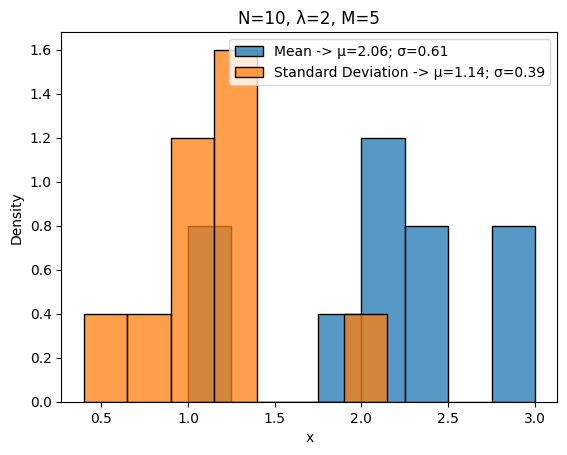

N=100, λ=2


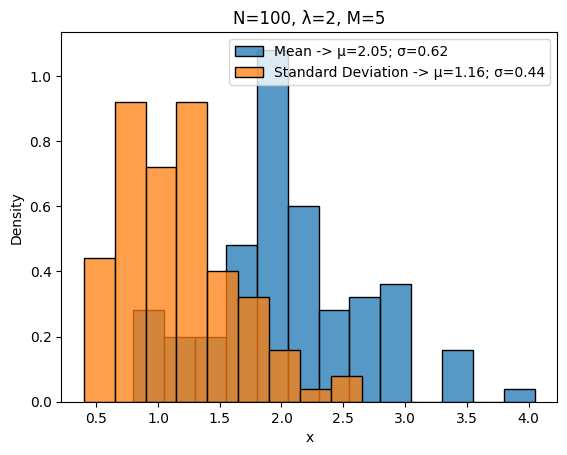

N=1000, λ=2


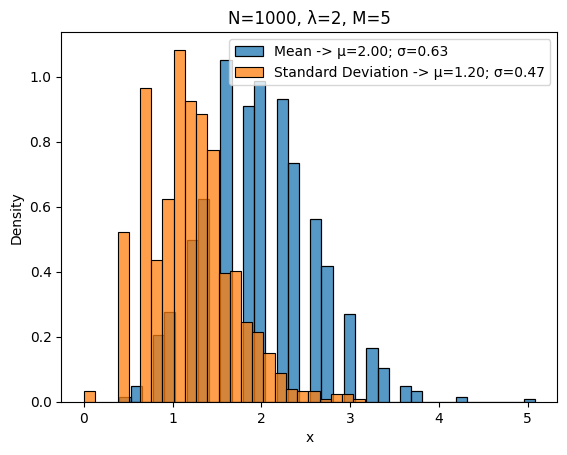

In [21]:
for N in [10, 100, 1000]:
    print(f'N={N}, λ={λ}')
    clt_exercice(N=N, λ=λ, plot=True, binwidth=min(4/np.sqrt(N),0.25))


a) µ5 does seep to approach a normal distribution but σ5 does not seem to necessairly approach a normal distribution at least for N=1000.

b) the variance of both µ5 and σ5 seem to be converging to somewhere between 0.6 to 0.7, for the µ5 and arround 0.45 for σ5

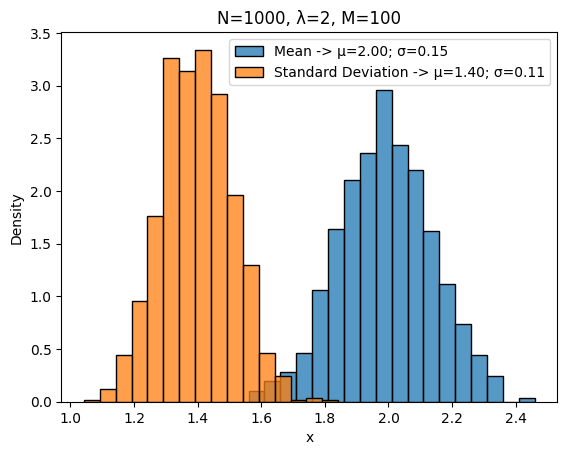

In [22]:
clt_exercice(N=1000, λ=λ, M=100, plot=True, binwidth=0.05)


Specially σ100 seems to converge faster to a normal distribution, and the standard deviation of both σ100 and µ100 seem significantly lower than for σ5 and µ5.

Nontheless there could be confusion about both distributions converging to a log-normal distribution (at least at this size)

# Bonus

In [23]:
def clt_exercice_t_dist(N, alpha=3.5, M=5, plot=False, binwidth=0.1, kde=False, xlim0=None,xlim1=None):
    # Create arrays
    µ_p = np.zeros(N)
    σ_p = np.zeros(N)

    # Generate the samples of size {M} from a t-distribution
    for i in range(N):
        sample_p = t.rvs(df=alpha, size=M)  # Generate t-distributed samples
        # Calculate the mean (µ) and standard deviation (σ)
        mean = np.mean(sample_p)
        std_deviation = np.std(sample_p)

        µ_p[i] = mean
        σ_p[i] = std_deviation

    if plot == True:
        sns.histplot(µ_p, stat='density', kde=kde, label=f'Mean -> µ={µ_p.mean():.2f}; σ={µ_p.std():.2f}', binwidth=binwidth)
        sns.histplot(σ_p, stat='density', kde=kde, label=f'Standard Deviation -> µ={σ_p.mean():.2f}; σ={σ_p.std():.2f}', binwidth=binwidth)
        plt.legend()
        plt.xlabel('x')
        if xlim0 != None and xlim1 != None:
            plt.xlim(xlim0,xlim1)
        plt.title(f'N={N}, alpha={alpha}, M={M}')
        plt.show()
        return None

    return µ_p, σ_p

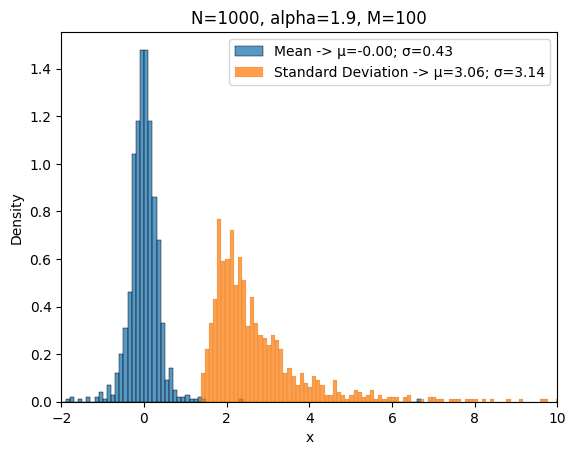

In [24]:
clt_exercice_t_dist(N=1000, alpha=1.9, M=100, plot=True, binwidth=0.1, kde=False, xlim0=-2,xlim1=10)



I used the Student T distribution with 1.9 degrees of freedom. Since it has low degrees of fereedom the higher moments do not exist, and the standard deviation tends to infinity. Nontheless since it has more than one degree of freedom, the mean does exist at x=0.

Therefore the mean of µ100 will tend to the acutal mean of 0, but the mean of σ100 is not neccesairly defined.